# 파이썬으로 이미지 파일 다루기<span class="tocSkip">

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Pillow-사용법" data-toc-modified-id="1.-Pillow-사용법-1">1. Pillow 사용법</a></span></li><li><span><a href="#2.-Pillow를-활용한-데이터-전처리" data-toc-modified-id="2.-Pillow를-활용한-데이터-전처리-2">2. Pillow를 활용한 데이터 전처리</a></span></li><li><span><a href="#3.-OpenCV-예제" data-toc-modified-id="3.-OpenCV-예제-3">3. OpenCV 예제</a></span></li><li><span><a href="#4.-실습-:-비슷한-이미지-찾아내기" data-toc-modified-id="4.-실습-:-비슷한-이미지-찾아내기-4">4. 실습 : 비슷한 이미지 찾아내기</a></span><ul class="toc-item"><li><span><a href="#4.1.-히스토그램-그리기" data-toc-modified-id="4.1.-히스토그램-그리기-4.1">4.1. 히스토그램 그리기</a></span></li><li><span><a href="#4.2.-프로그램-구현하기" data-toc-modified-id="4.2.-프로그램-구현하기-4.2">4.2. 프로그램 구현하기</a></span></li></ul></li></ul></div>

# 1. Pillow 사용법

In [1]:
import numpy as np
from PIL import Image

# 32X32 짜리 이미지를 생성해봅시다.
data = np.zeros([32, 32, 3], dtype=np.uint8)
image = Image.fromarray(data, 'RGB')
image.show()

In [2]:
# 검정색으로 초기화된 이미지를 빨간색으로 바꿔봅시다.
data[:, :] = [255, 0, 0]
image = Image.fromarray(data, 'RGB')
image.show()

In [3]:
# 가로 세로 각 128 픽셀짜리 흰색 이미지를 만들어 화면에 표시해 봅시다.
data = np.zeros([128, 128, 3], dtype=np.uint8)
data[:, :] = [255, 255, 255]
image = Image.fromarray(data, 'RGB')
image.show()

In [4]:
# 연습용 이미지를 열어 width와 height를 출력하고, .save()를 이용하여 jpg 파일 포맷으로 저장해 봅시다.
from PIL import Image
import os

# 연습용 파일 경로
image_path = os.getenv('HOME')+'/aiffel/python_image_proc/pillow_practice.png'

# 이미지 열기
img = Image.open(image_path)
img.show()

# width와 height 출력
print(img.width)
print(img.height)

# JPG 파일 형식으로 저장해보기
new_image_path = os.getenv('HOME')+'/aiffel/python_image_proc/pillow_practice.jpg'
img = img.convert('RGB')
img.save(new_image_path)

620
465


In [5]:
# .resize()를 이용하여 이미지 크기를 100X200으로 변경하여 저장해봅시다.
resized_image = img.resize((100, 200))
resized_image.show()

resized_image_path = os.getenv('HOME')+'/aiffel/python_image_proc/pillow_practice_resized.png'
resized_image.save(resized_image_path)

In [6]:
# .crop()을 이용하여 눈 부분만 잘라내어 저장해 봅시다.
box = (300, 100, 600, 400)
region = img.crop(box)
region.show()

cropped_image_path = os.getenv('HOME')+'/aiffel/python_image_proc/pillow_practice_cropped.png'
region.save(cropped_image_path)

# 2. Pillow를 활용한 데이터 전처리
CIFAR-100 데이터를 받아 개별 이미지 파일로 추출하기

In [7]:
import os
import pickle

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')
    
print(type(train))

<class 'dict'>


In [8]:
train.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

In [9]:
type(train[b'filenames'])

list

In [10]:
train[b'filenames'][0:5]

[b'bos_taurus_s_000507.png',
 b'stegosaurus_s_000125.png',
 b'mcintosh_s_000643.png',
 b'altar_boy_s_001435.png',
 b'cichlid_s_000031.png']

In [11]:
train[b'data'][0:5]

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       [124, 131, 135, ..., 232, 236, 231],
       [ 43,  32,  87, ...,  60,  29,  37]], dtype=uint8)

In [12]:
train[b'data'][0].shape

(3072,)

In [13]:
image_data = train[b'data'][0].reshape([32, 32, 3], order='F')   # order를 주의하세요!!
image = Image.fromarray(image_data)    # Pillow를 사용하여 Numpy 배열을 Image객체로 만들어서
image.show()    # 화면에 띄워 봅시다!!

In [14]:
image_data = image_data.swapaxes(0, 1)  # 축 바꾸기
image = Image.fromarray(image_data)
image.show()

In [15]:
import os
import pickle
from PIL import Image
import numpy
from tqdm import tqdm

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

# image를 저장할 cifar-100-python의 하위 디렉토리(images)를 생성합니다.
images_dir_path = os.path.join(dir_path, 'images')
if not os.path.exists(images_dir_path):
    os.mkdir(images_dir_path)  # images 디렉토리 생성

# 32X32의 이미지 파일 50000개를 생성합니다.
with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')
    for i in tqdm(range(len(train[b'filenames']))):
        filename = train[b'filenames'][i].decode()
        data = train[b'data'][i].reshape([32, 32, 3], order='F')
        image = Image.fromarray(data.swapaxes(0, 1))
        image.save(os.path.join(images_dir_path, filename))

100%|██████████| 50000/50000 [00:12<00:00, 4031.48it/s]


# 3. OpenCV 예제
카메라를 통해서 영상을 읽어 들이고 파란색 영역만 표시하기

In [16]:
import cv2 as cv
import numpy as np

cap = cv.VideoCapture(0)

while(1):
    
    # Take each frame
    _, frame = cap.read()
    
    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    
    # define range of blue color in HSV
    lower_blue = np.array([110, 50, 50])
    upper_blue = np.array([130, 255, 255])
    
    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    
    # Bitwise-AND mask and original image
    res = cv.bitwise_and(frame, frame, mask=mask)
    cv.imshow('frame', frame)
    cv.imshow('mask', mask)
    cv.imshow('res', res)
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break
        
cv.destroyAllWindows()
cap.release()

# 4. 실습 : 비슷한 이미지 찾아내기
CIFAR-100 이미지에서 색상 히스토그램을 추출하고, 각 이미지의 색상 분포를 비교하여 유사한 이미지를 찾아내기

## 4.1. 히스토그램 그리기

In [17]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

# 전처리 시 생성했던 디렉토리 구조
dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')
images_dir_path = os.path.join(dir_path, 'images')

In [18]:
# 파일명을 인자로 받아 해당 이미지 파일과 히스토그램을 출력해 주는 함수
def draw_color_histogram_from_image(file_name):
    image_path = os.path.join(images_dir_path, file_name)
    # 이미지 열기
    img = Image.open(image_path)
    cv_image = cv2.imread(image_path)
    
    # Image와 Histogram 그려보기
    f = plt.figure(figsize=(10,3))
    im1 = f.add_subplot(1,2,1)
    im1.imshow(img)
    im1.set_title("Image")
    
    im2 = f.add_subplot(1,2,2)
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        # image에서 i번째 채널의 히스토그램을 뽑아서(0:blue, 1:green, 2:red)
        histr = cv2.calcHist([cv_image], [i], None, [256], [0, 256])
        im2.plot(histr, color=col)   # 그래프를 그릴 때 채널 색상과 맞춰서 그립니다.
    im2.set_title("Histogram")

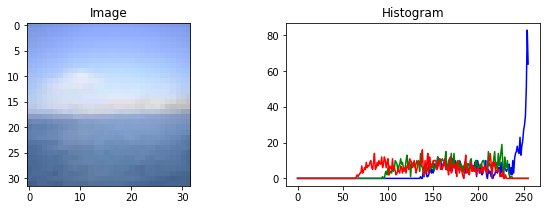

In [19]:
draw_color_histogram_from_image('adriatic_s_001807.png')

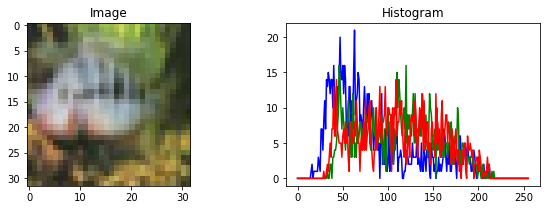

In [20]:
draw_color_histogram_from_image('cichlid_s_000031.png')

## 4.2. 프로그램 구현하기
- 프로그램이 실행된다.
- `build_histogram_db()`
    - CIFAR-100 이미지들을 불러온다.
    - CIFAR-100 이미지들을 하나하나 히스토그램으로 만든다.
    - 이미지 이름을 키로 하고, 히스토그램을 값으로 하는 딕셔너리 `histogram_db`를 반환한다.
- CIFAR-100 히스토그램 중 입력된 이미지 이름에 해당하는 히스토그램을 입력 이미지로 선택하여 `target_histogram`이라는 변수명으로 지정한다.
- `search()`
    - 입력 이미지 히스토그램 `target_histogram`와 전체 검색 대상 이미지들의 히스토그램을 가진 딕셔너리 `histogram_db`를 입력으로 받는다.
    - OpenCV의 `compareHist()` 함수를 사용하여 입력 이미지와 검색 대상 이미지 하나하나의 히스토그램 간 유사도를 계산한다. 결과는 `result`라는 이름의 딕셔너리로, 키는 이미지 이름, 값은 유사도로 한다.
    - 계산된 유사도를 기준으로 정렬하여 순서를 매긴다.
    - 유사도 순서상으로 상위 5개 이미지만 골라서 `result`에 남긴다.
- 고른 이미지들을 표시한다.
- 프로그램이 종료된다.

In [21]:
# 이미지 파일 1개에 대해 히스토그램을 만드는 함수
def get_histogram(image):
    histogram = []
    
    # Create histograms per channels, in 4 bins each.
    for i in range(3):
        channel_histogram = cv2.calcHist(images=[image],
                                        channels=[i],
                                        mask=None,
                                        histSize=[4],  # 히스토그램 구간을 4개로 한다.
                                        ranges=[0, 256])
        histogram.append(channel_histogram)
        
    histogram = np.concatenate(histogram)
    histogram = cv2.normalize(histogram, histogram)
    
    return histogram

In [22]:
filename = train[b'filenames'][0].decode()
file_path = os.path.join(images_dir_path, filename)
image = cv.imread(file_path)
histogram = get_histogram(image)
histogram

array([[0.3126804 ],
       [0.4080744 ],
       [0.14521089],
       [0.21940625],
       [0.18654831],
       [0.23742512],
       [0.30208108],
       [0.35931748],
       [0.06465594],
       [0.35825753],
       [0.36991683],
       [0.29254165]], dtype=float32)

In [23]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

# 모든 이미지를 불러와 이미지 이름을 키로 하고, 히스토그램을 값으로 하는 딕셔너리를 만드는 함수
def build_histogram_db():
    histogram_db = {}
    
    # 디렉토리에 모아 둔 이미지 파일들을 전부 리스트업합니다.
    path = images_dir_path
    file_list = os.listdir(images_dir_path)
    
    for file_name in tqdm(file_list):
        file_path = os.path.join(images_dir_path, file_name)
        image = cv.imread(file_path)
        
        histogram = get_histogram(image)
        histogram_db[file_name] = histogram
        
    return histogram_db

In [24]:
histogram_db = build_histogram_db()
histogram_db['adriatic_s_001807.png']

100%|██████████| 49999/49999 [00:04<00:00, 10637.50it/s]


array([[0.        ],
       [0.        ],
       [0.29744893],
       [0.5828624 ],
       [0.        ],
       [0.17107612],
       [0.41608465],
       [0.29315054],
       [0.        ],
       [0.34301192],
       [0.37224102],
       [0.16505837]], dtype=float32)

In [25]:
# target_histogram에 입력받은 이미지의 히스토그램을 저장하는 함수
def get_target_histogram():
    filename = input("이미지 파일명을 입력하세요: ")
    if filename not in histogram_db:
        print("유효하지 않은 이미지 파일명입니다.")
        return None
    return histogram_db[filename]

In [26]:
target_histogram = get_target_histogram()
target_histogram

이미지 파일명을 입력하세요: adriatic_s_001807.png


array([[0.        ],
       [0.        ],
       [0.29744893],
       [0.5828624 ],
       [0.        ],
       [0.17107612],
       [0.41608465],
       [0.29315054],
       [0.        ],
       [0.34301192],
       [0.37224102],
       [0.16505837]], dtype=float32)

In [29]:
# 입력받은 이미지 파일과 가장 유사한 상위 5개의 이미지를 검색해주는 함수
def search(histogram_db, target_histogram, top_k=5):
    results = {}
    
    # Calculate similarity distance by comparing histograms.
    for file_name, histogram in tqdm(histogram_db.items()):
        distance = cv2.compareHist(H1=target_histogram,
                                  H2=histogram,
                                  method=cv2.HISTCMP_CHISQR)
        results[file_name] = distance
        
    results = dict(sorted(results.items(), key=lambda item: item[1])[:top_k])
    return results

In [30]:
result = search(histogram_db, target_histogram)
result

100%|██████████| 49999/49999 [00:00<00:00, 630575.14it/s]


{'adriatic_s_001807.png': 0.0,
 'baby_s_001654.png': 0.047506706444185816,
 'fogbank_s_000423.png': 0.059270738493642845,
 'tank_s_000442.png': 0.060966690827361725,
 'dessert_plate_s_000124.png': 0.06113711905561663}

In [31]:
# result를 입력받아 5개의 이미지를 화면에 출력하는 함수
def show_result(result):
    f = plt.figure(figsize=(10, 3))
    for idx, filename in enumerate(result.keys()):
        img_path = os.path.join(images_dir_path, filename)
        im = f.add_subplot(1, len(result), idx+1)
        img = Image.open(img_path)
        im.imshow(img)

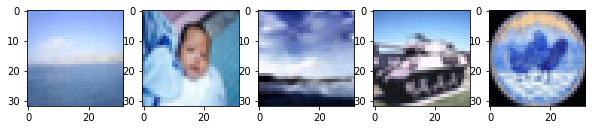

In [32]:
show_result(result)

이미지 파일명을 입력하세요: bos_taurus_s_000507.png


100%|██████████| 49999/49999 [00:00<00:00, 726405.21it/s]


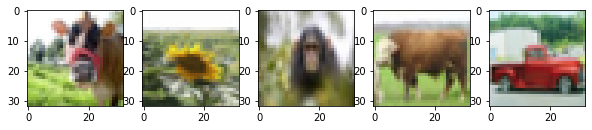

In [33]:
# 검색할 이미지를 Input으로 받으면 즉시 가장 유사한 이미지가 화면에 출력되는 코드
target_histogram = get_target_histogram()
result = search(histogram_db, target_histogram)
show_result(result)

이미지 파일명을 입력하세요: mcintosh_s_000643.png


100%|██████████| 49999/49999 [00:00<00:00, 730021.22it/s]


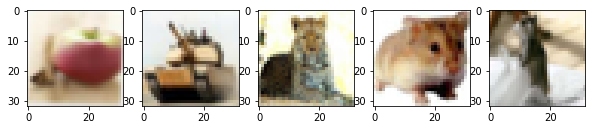

In [35]:
target_histogram = get_target_histogram()
result = search(histogram_db, target_histogram)
show_result(result)